In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina' 

pathlib.Path()
pathlib.Path().absolute()
# pathlib.Path('pythontutorial.py').absolute()


PosixPath('/Users/adrianstroth/Documents/Uni/HU Berlin/Computational Physics 2/Project 3 - Time-dependet Schroedinger Equation/TDSE/scripts')

## Stuff to do with data and pandas

In [14]:
# df = pd.read_csv("../data/gauss_wf_wall6_129_1_10_1_3_30_6_1.txt", sep="\t")
# df = pd.read_csv("../data/gauss_wf_wall6_129_1_10_2_3_30_6_1.txt", sep="\t")
# df.shape
# df.info()
# df.head()
# df.describe()

### A function to read in data and make a new dataframe for specific time checks out of it

In [298]:
def create_timecheck_df(nsteps, totaltime, timepercentage, integrator):
    '''
    Function that reads in data created by TDSE simulation 
    for given time steps 
    and returns timecheck dataframe
    '''
    
    count=False
    
    for i in nsteps:
        df = pd.read_csv("../data/gauss_wf_fixed_wall6_129_{}_{}_{}_3_30_6_1.txt".format(totaltime, i, integrator), sep="\t")
        index = timepercentage * i
        temp_df = pd.DataFrame(df.iloc[[index]])
        temp_df['nsteps'] = i

        if count == False:
            obs_df = pd.DataFrame(temp_df)
#             print("count {}".format(count))
            count = True
        else:
            obs_df = pd.concat([obs_df, temp_df], ignore_index=True)
#             print("count {}".format(count))

        obs_df['Tau'] = totaltime/obs_df['nsteps']
        print("../data/gauss_wf_fixed_wall6_129_{}_{}_{}_3_30_6_1.txt".format(totaltime, i, integrator))
        
    return obs_df;

## Recovering the same data from multiple data files
### Data for SSM

In [252]:
nsteps = [ 12500, 25000, 50000 ,100000, 200000, 400000, 800000, 1600000, 3200000 ]
# nsteps = [100000]
count = False
# time = 0.08
# time_index = 10000
totaltime = 1
timepercentage = 0.9
# it = 0
for i in nsteps:
    df = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_{}_2_3_30_6_1.txt".format(i), sep="\t")
#     index = time_index*(2**it)
#     it=+1
    index = timepercentage * i
    print(index)
    temp_df = pd.DataFrame(df.iloc[[index]])
#     temp_df = pd.DataFrame(df.loc[df['time']==time])
    temp_df['nsteps'] = i
#     print(temp_df)
    if count == False:
        ssm_obs_df = pd.DataFrame(temp_df)
#         averx_df = pd.DataFrame(df.loc[df['averx']>60])
#         averx_df['nsteps'] = i
        print("count {}".format(count))
        count = True
    else:
        ssm_obs_df = pd.concat([ssm_obs_df, temp_df], ignore_index=True)
#         averx_df = pd.DataFrame(df.loc[df['averx']>60])
#         averx_df['nsteps'] = i
        print("count {}".format(count))
        
for observable in ssm_obs_df[2:]:
    print(observable)
    
#temp_df
ssm_obs_df['Tau'] = totaltime/ssm_obs_df['nsteps']
ssm_obs_df

# ssm_obs_df.describe()
# df.head(-5)
# df.info()
# ssm_obs_df

11250.0
count False
22500.0
count True
45000.0
count True
90000.0
count True
180000.0
count True
360000.0
count True
720000.0
count True
1440000.0
count True
2880000.0
count True
time
REAL(psi[n])
IMAG(psi[n])
averx
deltax
averp
deltap
avg_state_energy
norm(psi)
nsteps


,time,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi),nsteps,Tau
0,0.9,2.299326e-314,0.196313,30.321019,6.00001,0.838554,0.045058,0.196313,1.0,12500,8.000000e-05
1,0.9,2.275493e-314,0.196313,30.321004,6.00001,0.838554,0.045058,0.196313,1.0,25000,4.000000e-05
2,0.9,2.315111e-314,0.196313,30.320997,6.00001,0.838554,0.045058,0.196313,1.0,50000,2.000000e-05
3,0.9,2.295200e-314,0.196313,30.320994,6.00001,0.838554,0.045058,0.196313,1.0,100000,1.000000e-05
4,0.9,2.231579e-314,0.196313,30.320992,6.00001,0.838554,0.045058,0.196313,1.0,200000,5.000000e-06
5,0.9,2.168440e-314,0.196313,30.320991,6.00001,0.838554,0.045058,0.196313,1.0,400000,2.500000e-06
6,0.9,2.295819e-314,0.196313,30.320991,6.00001,0.838554,0.045058,0.196313,1.0,800000,1.250000e-06
7,0.9,2.255770e-314,0.196313,30.320990,6.00001,0.838554,0.045058,0.196313,1.0,1600000,6.250000e-07
8,0.9,2.280623e-314,0.196313,30.320990,6.00001,0.838554,0.045058,0.196313,1.0,3200000,3.125000e-07


In [132]:
# ssm_obs_df
# df.loc[df['time']==0.]
averx_df.info()
averx_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7305 entries, 61853 to 69157
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              7305 non-null   float64
 1   REAL(psi[n])      7305 non-null   float64
 2   IMAG(psi[n])      7305 non-null   float64
 3   averx             7305 non-null   float64
 4   deltax            7305 non-null   float64
 5   averp             7305 non-null   float64
 6   deltap            7305 non-null   float64
 7   avg_state_energy  7305 non-null   float64
 8   norm(psi)         7305 non-null   float64
 9   nsteps            7305 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 627.8 KB


,time,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi),nsteps
61853,0.002899,2.229784e-314,0.196313,60.000275,4.363841,0.396959,0.712946,0.196313,1.0,3200000
61854,0.002899,2.229784e-314,0.196313,60.000764,4.363581,0.396868,0.712994,0.196313,1.0,3200000
61855,0.002899,2.229784e-314,0.196313,60.001253,4.363321,0.396778,0.713041,0.196313,1.0,3200000
61856,0.002900,2.229784e-314,0.196313,60.001743,4.363061,0.396687,0.713089,0.196313,1.0,3200000
61857,0.002900,2.229784e-314,0.196313,60.002232,4.362801,0.396596,0.713136,0.196313,1.0,3200000
...,...,...,...,...,...,...,...,...,...,...
69153,0.003242,2.229784e-314,0.196313,60.002569,4.480483,-0.392270,0.716198,0.196313,1.0,3200000
69154,0.003242,2.229784e-314,0.196313,60.002029,4.480808,-0.392368,0.716147,0.196313,1.0,3200000
69155,0.003242,2.229784e-314,0.196313,60.001487,4.481132,-0.392467,0.716097,0.196313,1.0,3200000
69156,0.003242,2.229784e-314,0.196313,60.000946,4.481456,-0.392565,0.716046,0.196313,1.0,3200000


### Creating plots 

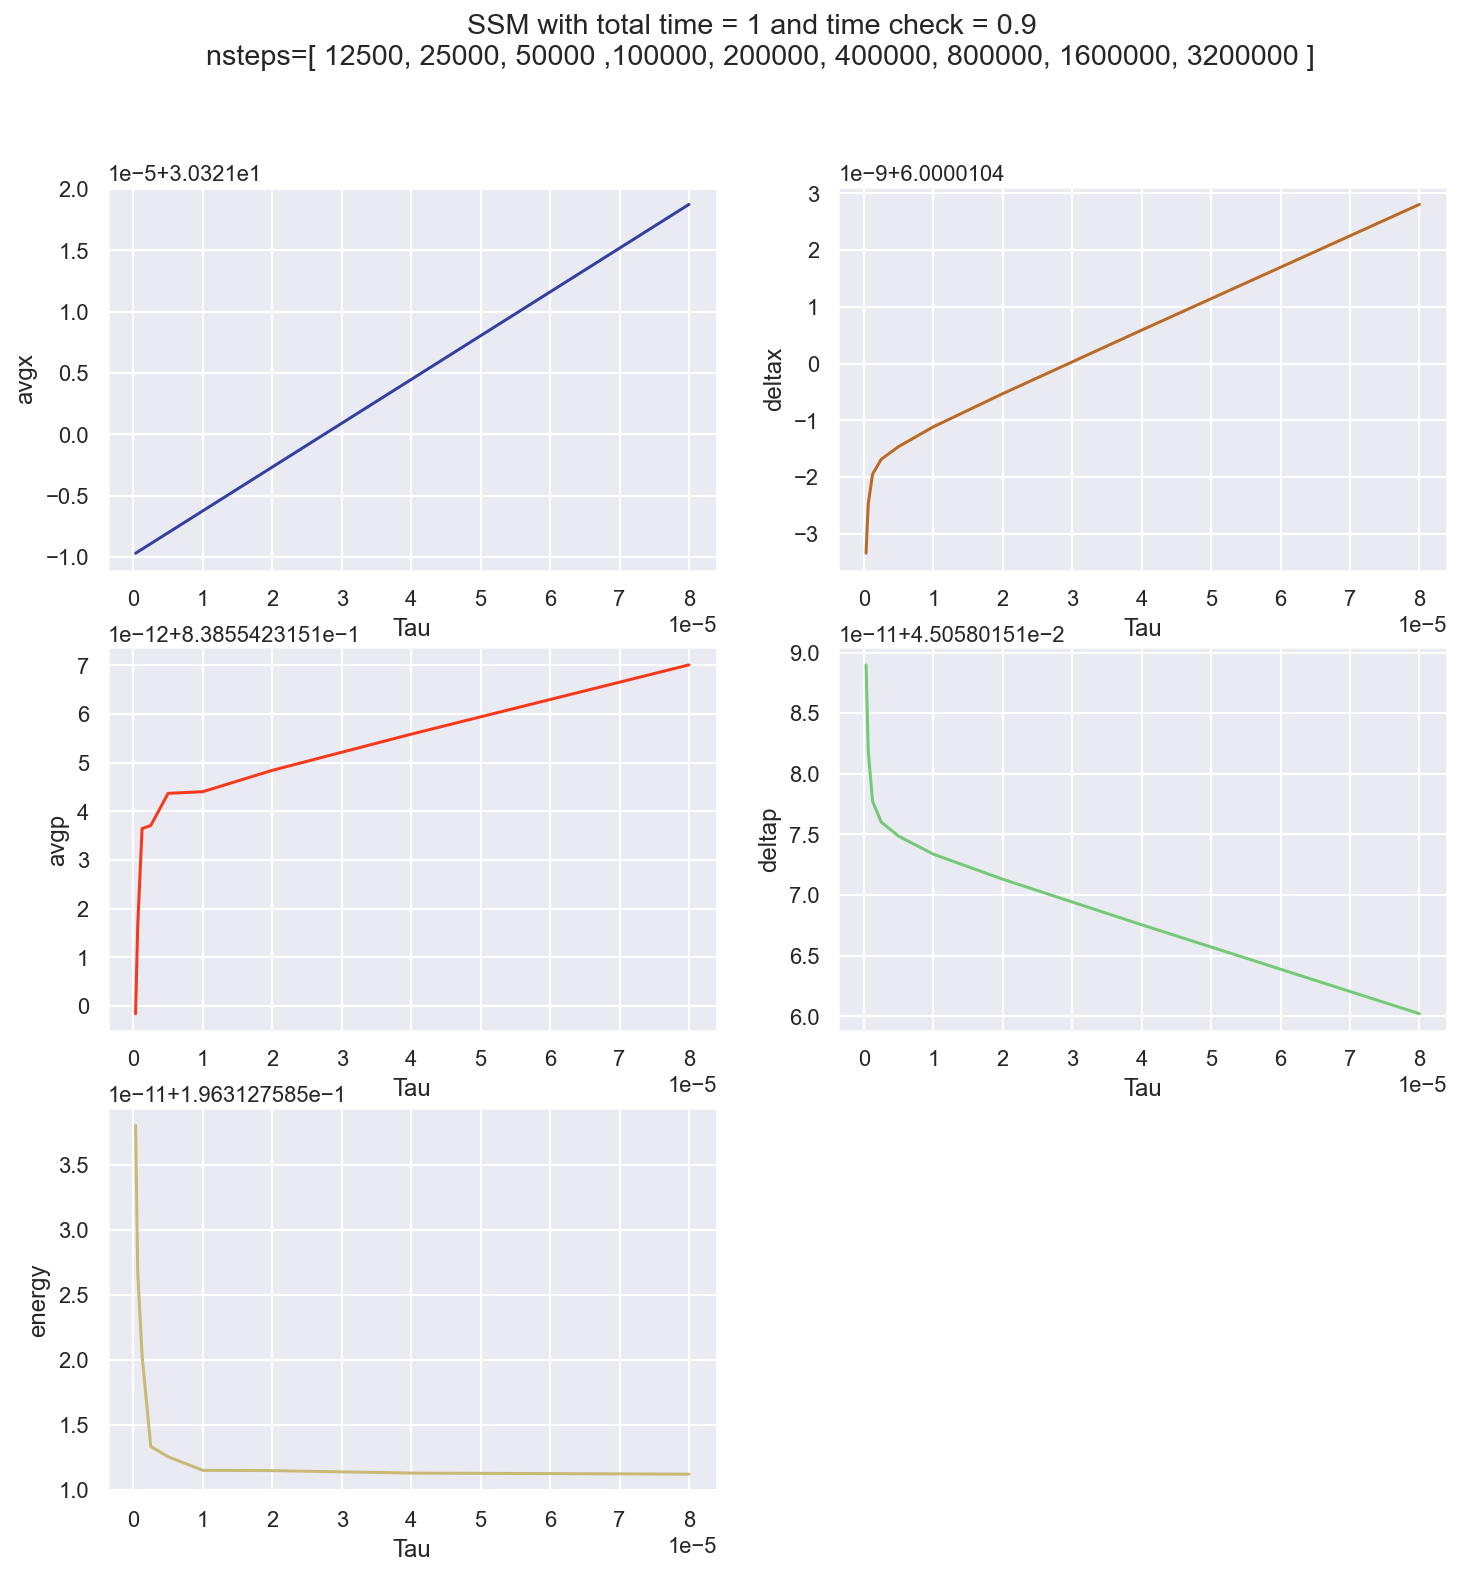

In [253]:
sns.set_theme()

fig = plt.figure(figsize=(12,12))
fig.suptitle('SSM with total time = {} and time check = {} \n nsteps=[ 12500, 25000, 50000 ,100000, 200000, 400000, 800000, 1600000, 3200000 ]'.format(totaltime, totaltime*timepercentage))

ax1 = plt.subplot(321)
ax1.plot(ssm_obs_df.Tau[:], ssm_obs_df.averx[:], label='avgx', color='#3340a0')
ax1.set_xlabel('Tau')
ax1.set_ylabel('avgx')
# ax1.set_xscale('log')

ax2 = plt.subplot(322)
ax2.plot(ssm_obs_df.Tau, ssm_obs_df.deltax, label='deltax', color='#ba6a25')
ax2.set_xlabel('Tau')
ax2.set_ylabel('deltax')
# ax2.set_xscale('log')

ax3 = plt.subplot(323)
ax3.plot(ssm_obs_df.Tau, ssm_obs_df.averp, label='avgp', color='#f7381b')
ax3.set_xlabel('Tau')
ax3.set_ylabel('avgp')
# ax3.set_xscale('log')

ax4 = plt.subplot(324)
ax4.plot(ssm_obs_df.Tau, ssm_obs_df.deltap, label='deltap', color='#74c976')
ax4.set_xlabel('Tau')
ax4.set_ylabel('deltap')
# ax4.set_xscale('log')


ax5 = plt.subplot(325)
ax5.plot(ssm_obs_df.Tau, ssm_obs_df.avg_state_energy, label='energy', color='#c9b974')
ax5.set_xlabel('Tau')
ax5.set_ylabel('energy')
# ax5.set_xscale('log')



plt.savefig('../plots/SSM_fixed_tt{}_pt{}_newlong.png'.format(totaltime, totaltime*timepercentage), dpi=300)
plt.show()

### Trying to make it more consise

In [224]:
# list_of_dfs = [pd.read_csv("../data/gauss_wf_wall6_129_1_{}_2_3_30_6_1.txt".format(i), sep="\t") for i in nsteps]
# list_of_dfs[0].head()
# for df in list_of_dfs:
#     temp_df = pd.DataFrame(df.iloc[[-1]])
#     concat_df = pd.concat(temp_df)

### Reading in data for UCM

In [250]:
ucm_nsteps = [ 12500, 25000, 50000 ,100000, 200000, 400000, 800000, 1600000, 3200000 ]
ucm_totaltime = 1
ucm_timepercentage = 0.9
ucm_integrator = 1

ucm_obs_df = create_timecheck_df(ucm_nsteps, ucm_totaltime, ucm_timepercentage, ucm_integrator)
ucm_obs_df

,time,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi),nsteps,Tau
0,0.9,2.288941e-314,0.196313,30.321019,6.00001,0.838554,0.045058,0.196313,1.0,12500,8.000000e-05
1,0.9,2.328125e-314,0.196313,30.321004,6.00001,0.838554,0.045058,0.196313,1.0,25000,4.000000e-05
2,0.9,2.314302e-314,0.196313,30.320997,6.00001,0.838554,0.045058,0.196313,1.0,50000,2.000000e-05
3,0.9,2.184387e-314,0.196313,30.320994,6.00001,0.838554,0.045058,0.196313,1.0,100000,1.000000e-05
4,0.9,2.225014e-314,0.196313,30.320992,6.00001,0.838554,0.045058,0.196313,1.0,200000,5.000000e-06
5,0.9,2.222719e-314,0.196313,30.320991,6.00001,0.838554,0.045058,0.196313,1.0,400000,2.500000e-06
6,0.9,2.271152e-314,0.196313,30.320991,6.00001,0.838554,0.045058,0.196313,1.0,800000,1.250000e-06
7,0.9,2.147523e-314,0.196313,30.320990,6.00001,0.838554,0.045058,0.196313,1.0,1600000,6.250000e-07
8,0.9,2.314437e-314,0.196313,30.320990,6.00001,0.838554,0.045058,0.196313,1.0,3200000,3.125000e-07


### Plotting UCM data
#### trying slightly different plotting call

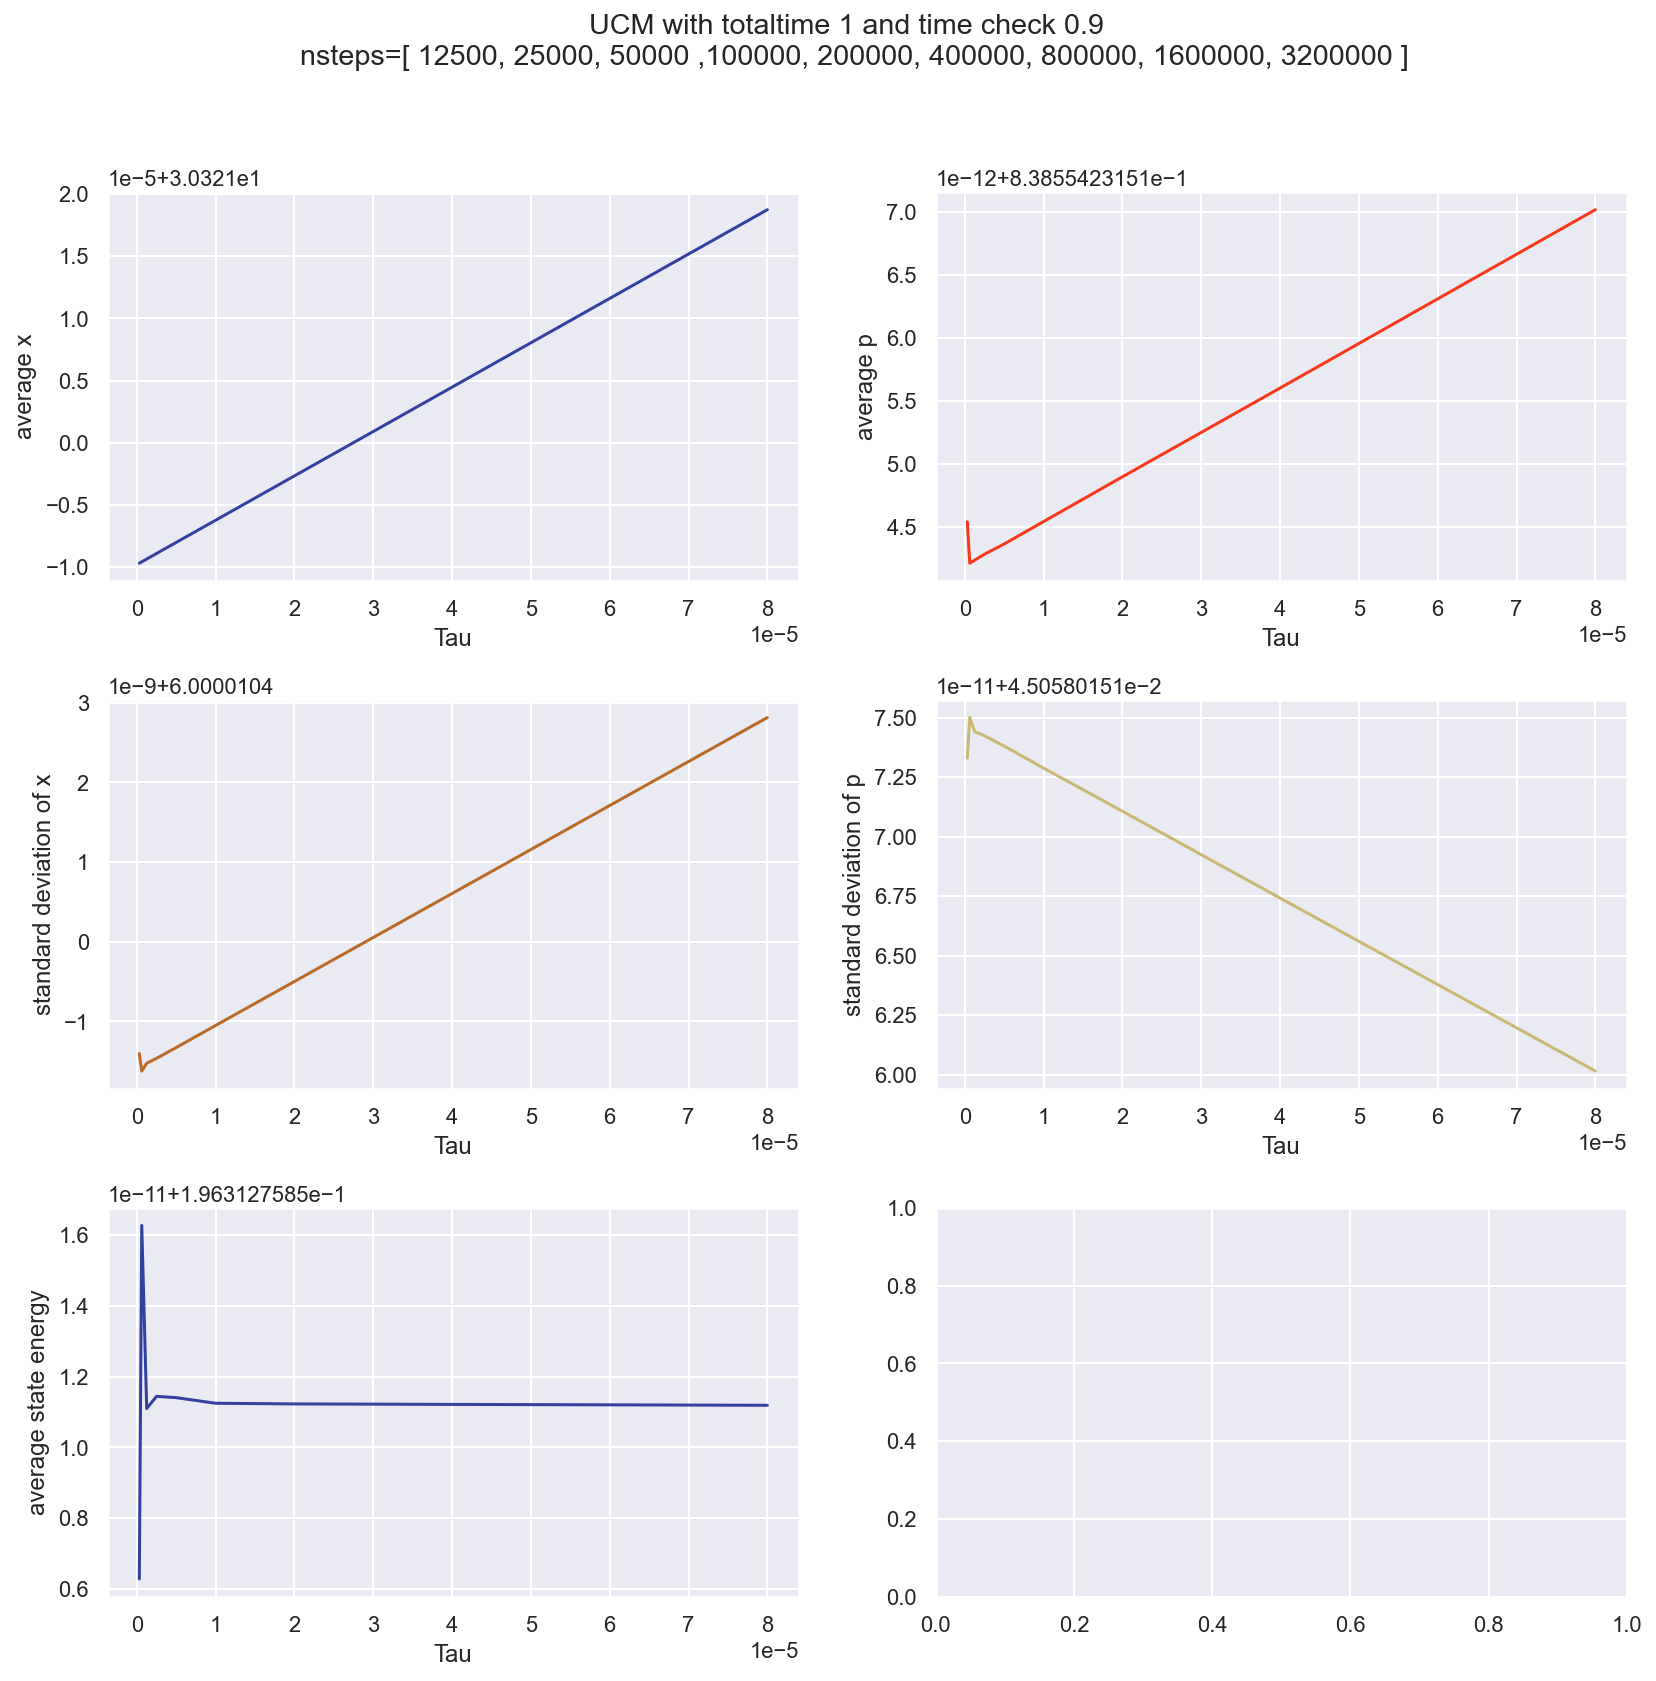

In [251]:
fig_ucm, ax_ucm = plt.subplots(3, 2, figsize=(12,12))
fig_ucm.suptitle('UCM with totaltime {} and time check {} \n nsteps=[ 12500, 25000, 50000 ,100000, 200000, 400000, 800000, 1600000, 3200000 ]'.format(ucm_totaltime, ucm_totaltime*ucm_timepercentage))
fig_ucm.tight_layout(pad=3)

# print(ax_ucm)
# print(type(ax_ucm))

ax_ucm[0, 0].plot(ucm_obs_df.Tau, ucm_obs_df.averx, label='avgx', color='#3340a0')
ax_ucm[0, 0].set(xlabel='Tau', ylabel='average x')

ax_ucm[1, 0].plot(ucm_obs_df.Tau, ucm_obs_df.deltax, label='avgx', color='#ba6a25')
ax_ucm[1, 0].set(xlabel='Tau', ylabel='standard deviation of x')

ax_ucm[0, 1].plot(ucm_obs_df.Tau, ucm_obs_df.averp, label='avgp', color='#f7381b')
ax_ucm[0, 1].set(xlabel='Tau', ylabel='average p')

ax_ucm[1, 1].plot(ucm_obs_df.Tau, ucm_obs_df.deltap, label='deltap', color='#c9b974')
ax_ucm[1, 1].set(xlabel='Tau', ylabel='standard deviation of p')

ax_ucm[2, 0].plot(ucm_obs_df.Tau, ucm_obs_df.avg_state_energy, label='avg_state_energy', color='#3340a0')
ax_ucm[2, 0].set(xlabel='Tau', ylabel='average state energy')

fig.savefig('../plots/UCM_fixed_tt{}_pt{}_newlong.png'.format(ucm_totaltime, ucm_totaltime*ucm_timepercentage), dpi=300)
plt.show()

### Reading in data for Euler

In [307]:
euler_nsteps = [ 25000, 50000 ,100000, 200000, 400000, 800000, 1600000, 3200000 ]
euler_totaltime = 0.15
euler_timepercentage = 0.5
euler_integrator = 0

euler_obs_df = create_timecheck_df(euler_nsteps, euler_totaltime, euler_timepercentage, euler_integrator)
euler_obs_df.head()

,time,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi),nsteps,Tau
0,0.075,2.336740e-314,0.196313,30.026757,5.999986,0.838554,0.045058,0.196313,1.0,25000,6.000000e-06
1,0.075,2.353250e-314,0.196313,30.026755,5.999986,0.838554,0.045058,0.196313,1.0,50000,3.000000e-06
2,0.075,2.292856e-314,0.196313,30.026755,5.999986,0.838554,0.045058,0.196313,1.0,100000,1.500000e-06
3,0.075,2.276584e-314,0.196313,30.026755,5.999986,0.838554,0.045058,0.196313,1.0,200000,7.500000e-07
4,0.075,2.274578e-314,0.196313,30.026755,5.999986,0.838554,0.045058,0.196313,1.0,400000,3.750000e-07


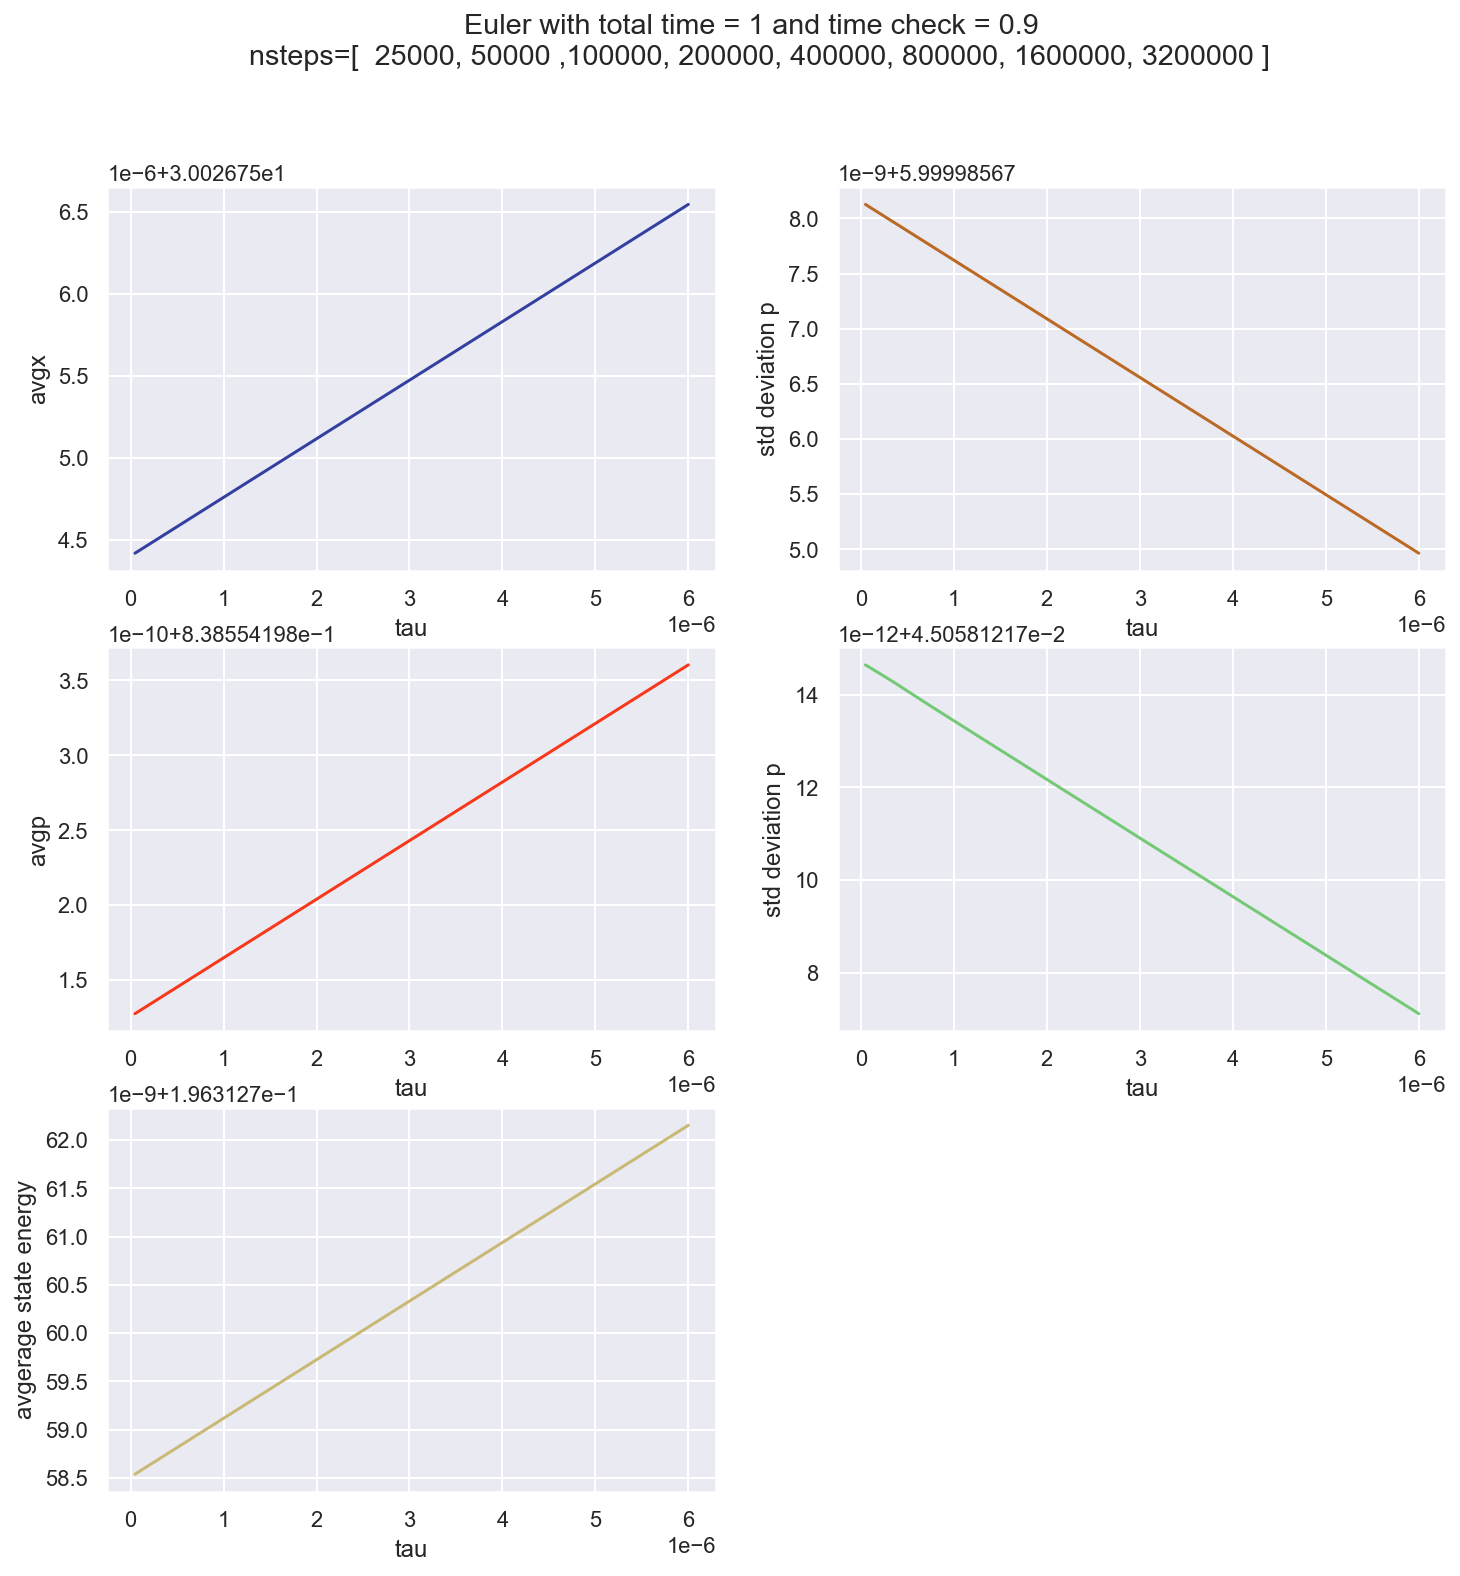

In [308]:
sns.set_theme()

fig = plt.figure(figsize=(12,12))
fig.suptitle('Euler with total time = {} and time check = {} \n nsteps=[  25000, 50000 ,100000, 200000, 400000, 800000, 1600000, 3200000 ]'.format(totaltime, totaltime*timepercentage))

ax1 = plt.subplot(321)
ax1.plot(euler_obs_df.Tau, euler_obs_df.averx, label='avgx', color='#3340a0')
ax1.set(xlabel='tau', ylabel='avgx')

ax2 = plt.subplot(322)
ax2.plot(euler_obs_df.Tau, euler_obs_df.deltax, label='deltax', color='#ba6a25')
ax2.set(xlabel='tau', ylabel='std deviation p')

ax3 = plt.subplot(323)
ax3.plot(euler_obs_df.Tau, euler_obs_df.averp, label='avgp', color='#f7381b')
ax3.set(xlabel='tau', ylabel='avgp')

ax4 = plt.subplot(324)
ax4.plot(euler_obs_df.Tau, euler_obs_df.deltap, label='deltap', color='#74c976')
ax4.set(xlabel='tau', ylabel='std deviation p')

ax5 = plt.subplot(325)
ax5.plot(euler_obs_df.Tau, euler_obs_df.avg_state_energy, label='energy', color='#c9b974')
ax5.set(xlabel='tau', ylabel='avgerage state energy')



plt.savefig('../plots/Euler_fixed_tt{}_pt{}_newlong.png'.format(totaltime, totaltime*timepercentage), dpi=300)
plt.show()

## Other stuff

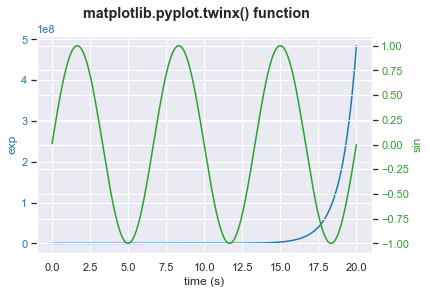

In [7]:
# Create some mock data 
t = np.arange(0.01, 20.0, 0.001) 
data1 = np.exp(t) 
data2 = np.sin(0.3 * np.pi * t) 
   
fig, ax1 = plt.subplots() 
   
color = 'tab:blue'
ax1.set_xlabel('time (s)') 
ax1.set_ylabel('exp', color = color) 
ax1.plot(t, data1, color = color) 
ax1.tick_params(axis ='y', labelcolor = color) 
   
ax2 = ax1.twinx() 
   
color = 'tab:green'
ax2.set_ylabel('sin', color = color) 
ax2.plot(t, data2, color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
  
fig.suptitle('matplotlib.pyplot.twinx() function ', fontweight ="bold") 

plt.show() 

In [59]:
x = np.array([0.003, 0.004, 0.005, 0.006])
y = x/60
y
steps = 1/y
steps


array([20000., 15000., 12000., 10000.])

### Printing time evolution of SSM with short time 0.15

In [219]:
# data1 = pd.read_csv("../data/gauss_wf_short_wall6_129_0.15_1600000_2_3_30_6_1.txt".format(i), sep="\t")
# data2 = pd.read_csv("../data/gauss_wf_short_wall6_129_0.15_800000_2_3_30_6_1.txt".format(i), sep="\t")
# data3 = pd.read_csv("../data/gauss_wf_short_wall6_129_0.15_400000_2_3_30_6_1.txt".format(i), sep="\t")

data1 = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_800000_2_3_30_6_1.txt".format(i), sep="\t")
data2 = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_400000_2_3_30_6_1.txt".format(i), sep="\t")
data3 = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_200000_2_3_30_6_1.txt".format(i), sep="\t")
data3 = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_100000_2_3_30_6_1.txt".format(i), sep="\t")
data4 = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_50000_2_3_30_6_1.txt".format(i), sep="\t")
data5 = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_25000_2_3_30_6_1.txt".format(i), sep="\t")


data.head()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time              800000 non-null  float64
 1   REAL(psi[n])      800000 non-null  float64
 2   IMAG(psi[n])      800000 non-null  float64
 3   averx             800000 non-null  float64
 4   deltax            800000 non-null  float64
 5   averp             800000 non-null  float64
 6   deltap            800000 non-null  float64
 7   avg_state_energy  800000 non-null  float64
 8   norm(psi)         800000 non-null  float64
dtypes: float64(9)
memory usage: 54.9 MB


In [204]:
# arr1 = data1[np.mod(np.arange(data1.index.size),10000)==0]
# # arr = np.mod(np.arange(data.index.size),1000)
# # arr.size
# arr1.info()

# arr2 = data2[np.mod(np.arange(data2.index.size),10000)==0]
# arr3 = data3[np.mod(np.arange(data3.index.size),10000)==0]
# arr2.info()
# arr = np.mod(np.arange(data1.index.size),1000)
# arr
# arr1

# data1 = data1[np.mod(np.arange(data1.index.size),10000)==0]
# data2 = data2[np.mod(np.arange(data2.index.size),10000)==0]
# data3 = data3[np.mod(np.arange(data3.index.size),10000)==0]


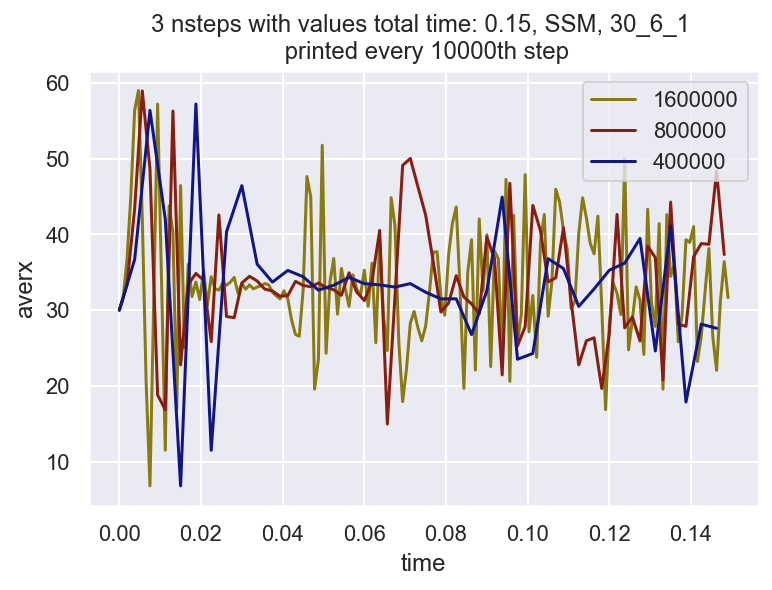

In [205]:
label1 = '800000'
label2 = '400000'
label3 = '200000'
label3 = '100000'
label4 = '50000'
label5 = '25000'

sns.set_theme()

plt.plot(data1['time'], data1['averx'], label=label1, color='#897b10')
plt.plot(data2.time, data2['averx'], label=label2, color='#891e10')
plt.plot(data3.time, data3['averx'], label=label3, color='#101689')

plt.xlabel('time')
plt.ylabel('averx')

plt.legend()
plt.title('3 nsteps with values total time: 0.15, SSM, 30_6_1 \n printed every 10000th step')
plt.savefig('../plots/3 nsteps with values total time 0.15 SSM every 1000th step.png', dpi=300)
plt.show()

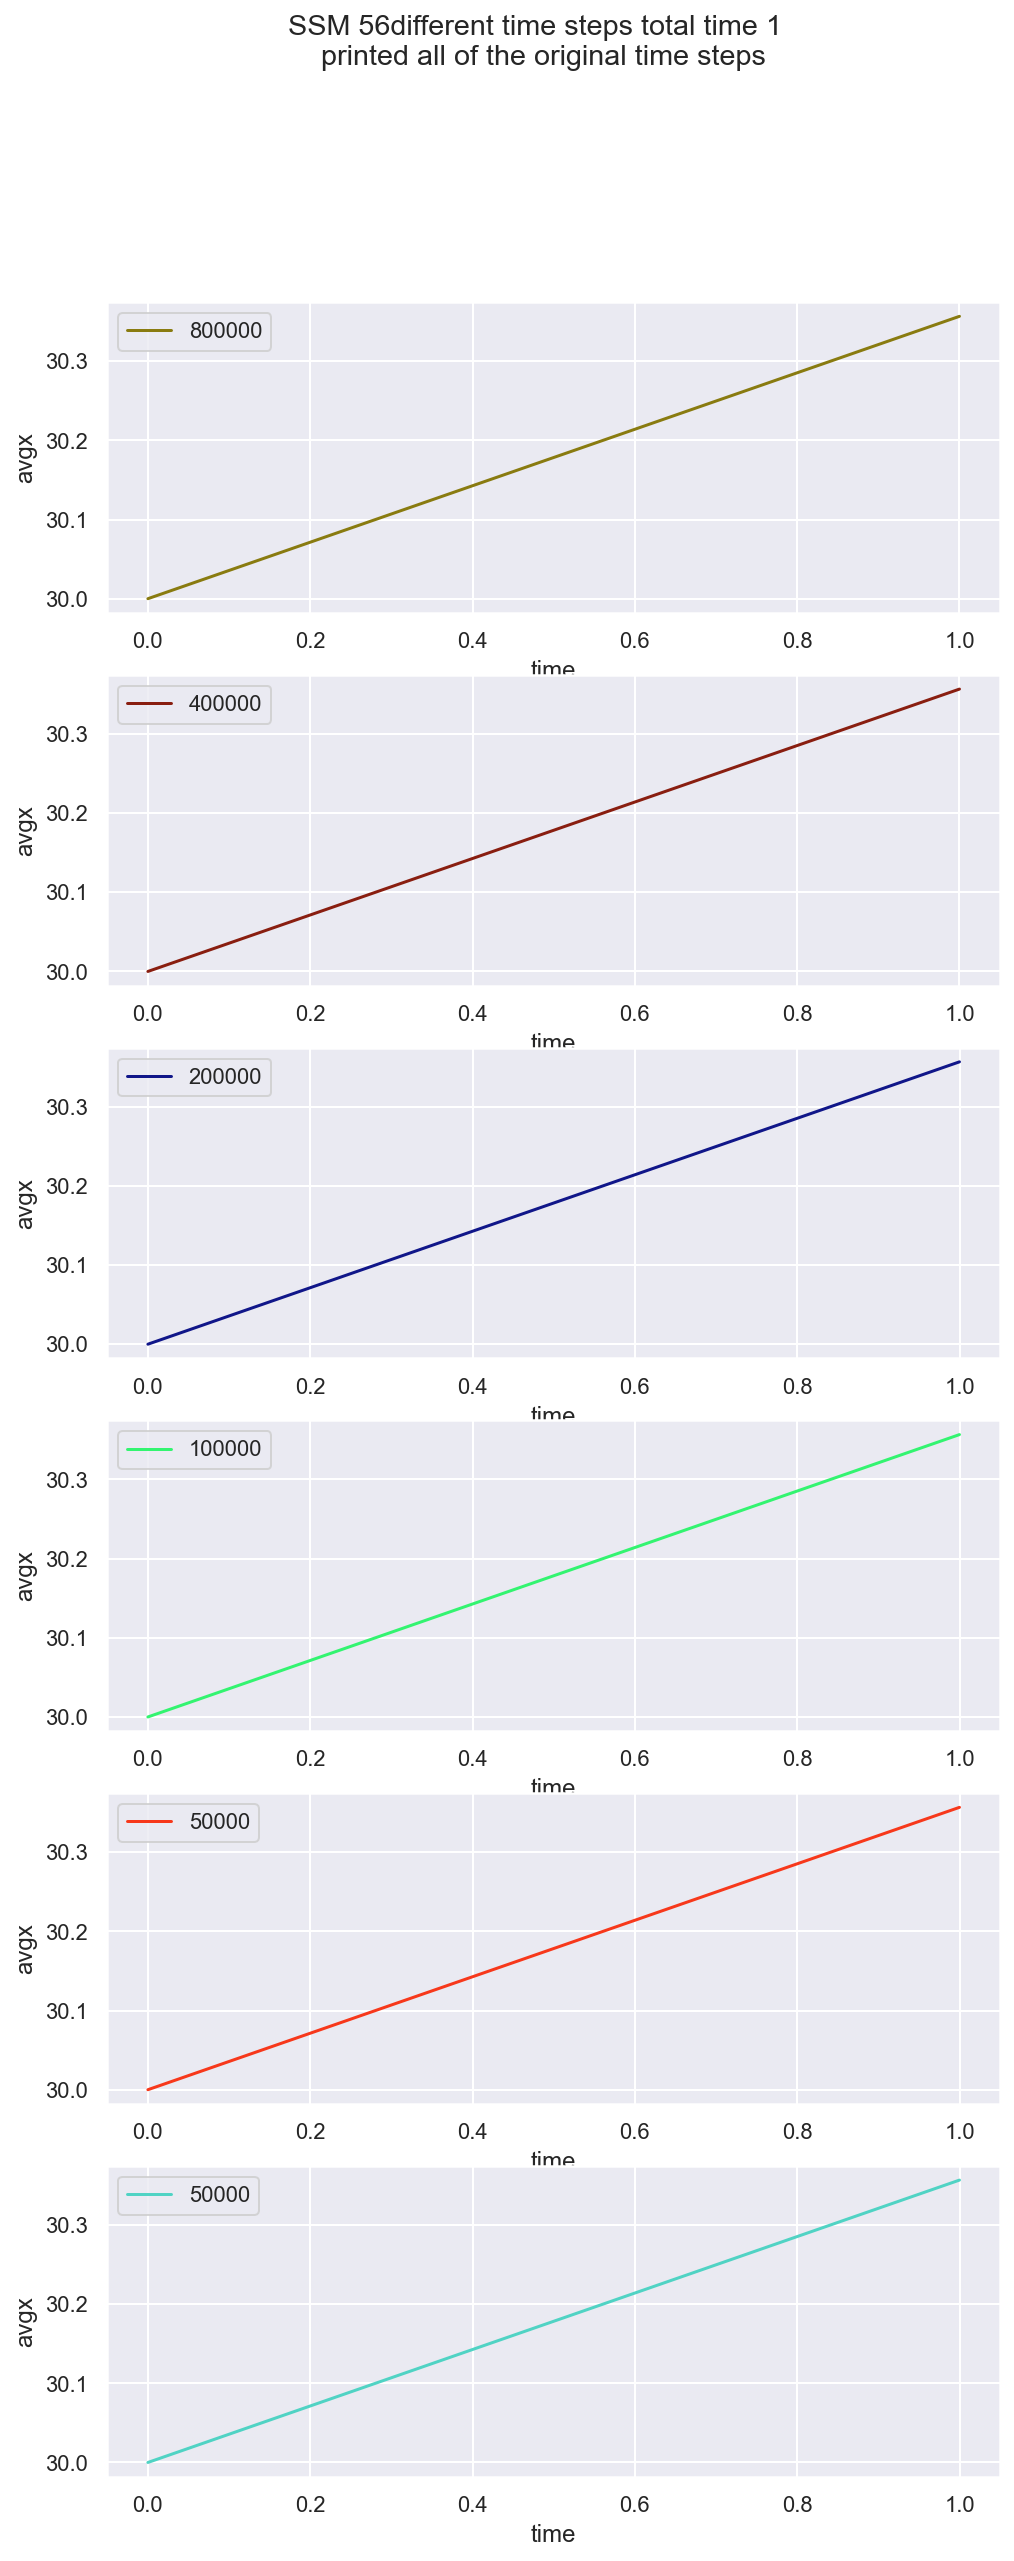

In [222]:
sns.set_theme()

fig = plt.figure(figsize=(8,20))
fig.suptitle('SSM 56different time steps total time 1 \n printed all of the original time steps')

ax1 = plt.subplot(611)
ax1.plot(data1.time, data1.averx, label='800000', color='#897b10')
ax1.set_xlabel('time')
ax1.set_ylabel('avgx')
# ax1.set_title('nsteps 1600000')
ax1.legend()

ax2 = plt.subplot(612)
ax2.plot(data2.time, data2.averx, label='400000', color='#891e10')
ax2.set_xlabel('time')
ax2.set_ylabel('avgx')
# ax2.set_title('nsteps 800000')
ax2.legend()

ax3 = plt.subplot(613)
ax3.plot(data3.time, data3.averx, label='200000', color='#101689')
ax3.set_xlabel('time')
ax3.set_ylabel('avgx')
# ax3.set_title('nsteps 400000')
# ax3.set_xscale('log')
ax3.legend()

ax3 = plt.subplot(614)
ax3.plot(data3.time, data3.averx, label='100000', color='#33f470')
ax3.set_xlabel('time')
ax3.set_ylabel('avgx')
ax3.legend()

ax3 = plt.subplot(615)
ax3.plot(data3.time, data3.averx, label='50000', color='#f7381b')
ax3.set_xlabel('time')
ax3.set_ylabel('avgx')
ax3.legend()

ax3 = plt.subplot(616)
ax3.plot(data3.time, data3.averx, label='50000', color='#50d3c4')
ax3.set_xlabel('time')
ax3.set_ylabel('avgx')
ax3.legend()

plt.savefig('../plots/SSM 3 fixed all time steps.png', dpi=500)
# plt.savefig('../plots/SSM 3 of nsteps.png', dpi=300)
plt.show()

### Printing time evolution of Euler for long time 1

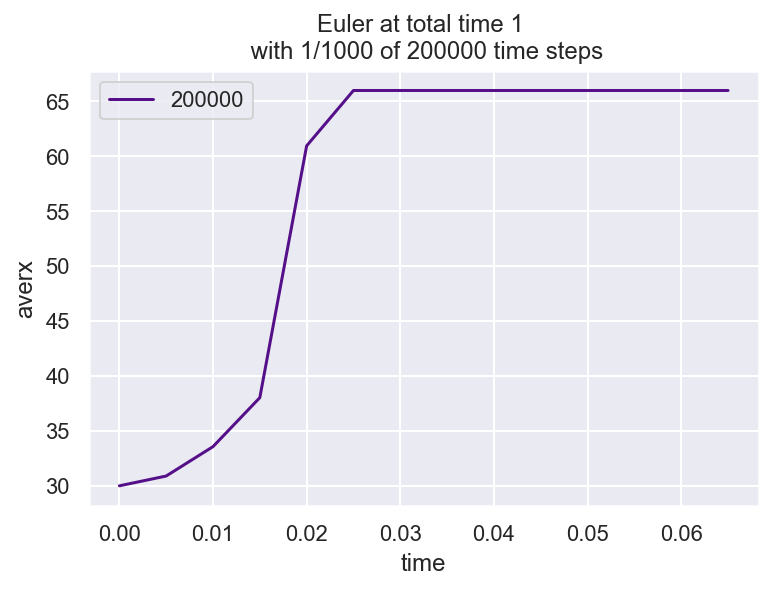

In [193]:
lt_data1 = pd.read_csv("../data/gauss_wf_short_wall6_129_1_200000_0_3_30_6_1.txt".format(i), sep="\t")
lt_arr1 = lt_data1[np.mod(np.arange(lt_data1.index.size),1000)==0]

plt.plot(lt_arr1['time'], lt_arr1['averx'], label='200000', color='#551089')
plt.xlabel('time')
plt.ylabel('averx')
plt.title('Euler at total time 1 \n with 1/1000 of 200000 time steps')
plt.legend()
plt.show()

### Trying to read in data more consise
- `lamda` is a short function, that returns boolian value
- `map` can be used with the lambda functino to map the called list
- `filter` can be used with the lambda function to filter all true values 

In [268]:
# arr = np.arange(0, 100)
# arr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

skiprows = lambda x: 0 != x%2
print(skiprows(arr))

maparr = map(skiprows(arr), arr)
maparr2 = map(lambda x: 0 != x%2, arr)
print(maparr)
print(maparr2)

filarr = filter(skiprows(arr), arr)
filarr2 = filter(lambda x: 0 != x%2, arr)
print(filarr)
print(filarr2)

In [294]:
# tsteps = [ 12500, 25000, 50000 ,100000, 200000, 400000, 800000, 1600000, 3200000 ]
tsteps = [25000]
# list_of_data = [pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_{}_1_3_30_6_1.txt".format(i), sep="\t", header=0 ,skiprows = lambda x: 0 != x%500) for i in tsteps ]
list_of_data = [pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_{}_1_3_30_6_1.txt".format(i), sep="\t") for i in tsteps ]

In [295]:
range(len(list_of_data))
print(list_of_data[0].head())

      time   REAL(psi[n])  IMAG(psi[n])      averx    deltax     averp  \
0  0.00000  2.328125e-314      0.000000  30.000020  5.999985  0.838554   
1  0.00004  2.328125e-314      0.196313  30.000034  5.999985  0.838554   
2  0.00008  2.328125e-314      0.196313  30.000048  5.999985  0.838554   
3  0.00012  2.328125e-314      0.196313  30.000063  5.999985  0.838554   
4  0.00016  2.328125e-314      0.196313  30.000077  5.999985  0.838554   

     deltap  avg_state_energy  norm(psi)  
0  0.045058          0.196313        1.0  
1  0.045058          0.196313        1.0  
2  0.045058          0.196313        1.0  
3  0.045058          0.196313        1.0  
4  0.045058          0.196313        1.0  


AttributeError: 'DataFrame' object has no attribute 'time'

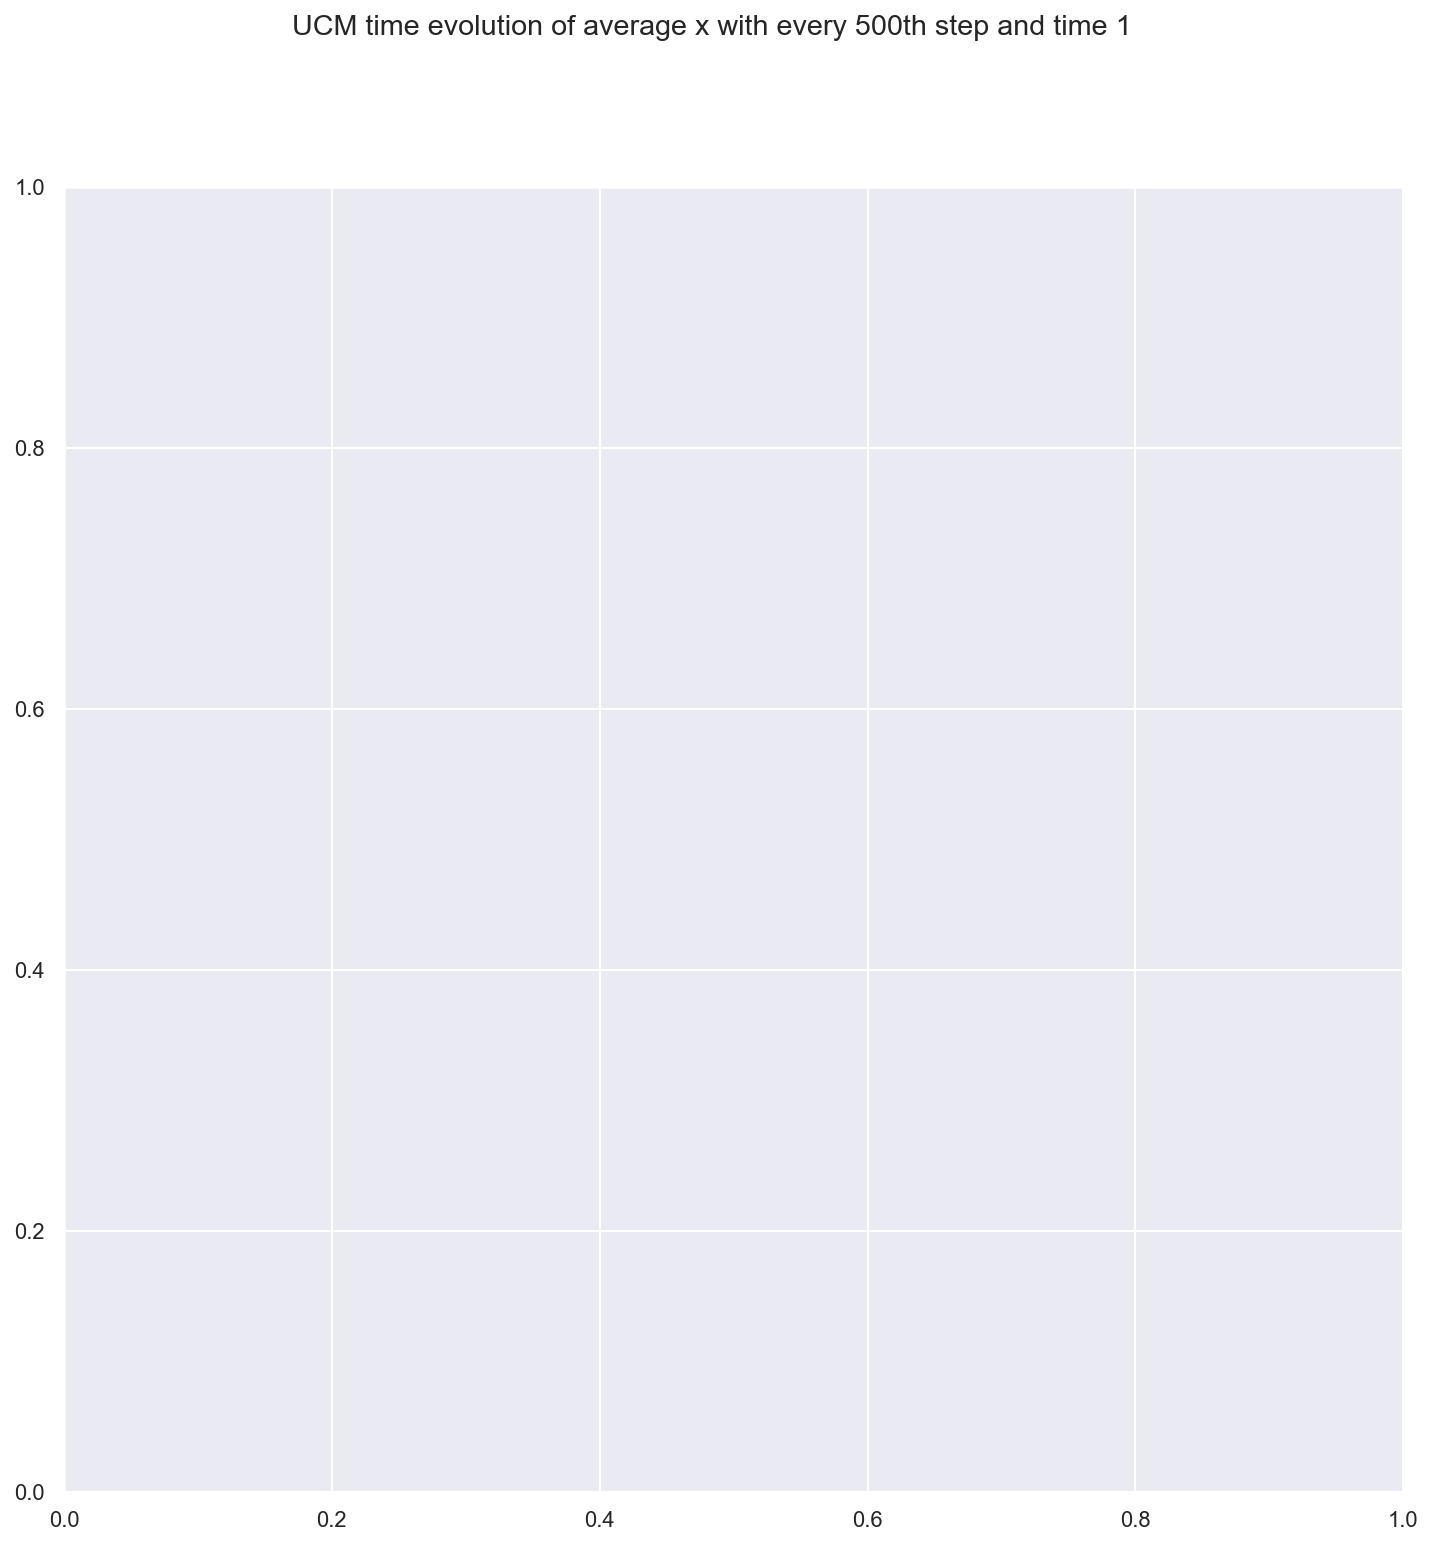

In [284]:
fig, ax = plt.subplots(figsize=(12,12))
fig.suptitle('UCM time evolution of average x with every 500th step and time 1')

color = ['navy', 'green', 'gold', 'indianred', 'mediumorchid', 'aqua', 'yellow', 'lightsalmon', 'palegreen']
for dat in range(len(list_of_data)):
    ax = plt.plot(list_of_data[dat].time, list_of_data[dat].averx, label='{}'.format(tsteps[dat]), color=color)